In [1]:
# importing all the important libraries.

# it is python library which is used to work with datasets.
import pandas as PD 
# it is python library which is used to work with arrays.
import numpy as np 
# K-means is a way to group data points without being told what to do. The algorithm divides the data points in to the K clusters by reducing the amount of difference between each cluster.
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plots

# importing warnings.
import warnings 
warnings.filterwarnings('ignore')     

# K Means Clustering

In [2]:
# Creates the function for analyse the dataset.
def read_dataset(new_file):
    electricity_data = PD.read_csv(new_file, skiprows=4) # using pandas read data and skip starting 4 rows from data.
    electricity_data1 = electricity_data.drop(['Unnamed: 66', 'Indicator Code',  'Country Code'],axis=1) # dropping the columns.
    electricity_data2 = electricity_data1.set_index("Country Name")  
    electricity_data2=electricity_data2.T 
    electricity_data2.reset_index(inplace=True) 
    electricity_data2.rename(columns = {'index':'Year'}, inplace = True) 
    return electricity_data1, electricity_data2 

# define the path of electricity data.
new_file = '/content/drive/MyDrive/Rahul Assignment/API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_4771419.csv'  
Final_Dataset, Transpose_data = read_dataset(new_file)   
Final_Dataset.head() # showing starting rows. 

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
1,Africa Eastern and Southern,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.682318,31.610692,31.824950,33.744405,38.733352,40.092163,42.880977,44.073912,45.609604,NaN
2,Afghanistan,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.099998,68.290649,89.500000,71.500000,97.699997,97.699997,96.616135,97.699997,97.699997,NaN
3,Africa Western and Central,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.137410,47.029335,47.587145,46.750946,50.931399,48.835062,51.238518,51.260220,52.082053,NaN
4,Angola,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.131321,38.278030,32.000000,42.000000,41.813129,43.013260,45.290001,45.642799,46.890610,NaN


In [3]:
Transpose_data.head()

Country Name,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,Indicator Name,Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),...,Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population),Access to electricity (% of population)
1,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Extracting 20 years of data with the help of function.
def Final_Dataset2(Final_Dataset): 
    Final_Dataset1 = Final_Dataset[['Country Name', 'Indicator Name','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
                                    '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']] 
    Final_Dataset2 = Final_Dataset1.dropna() # drop null values from data.
    return Final_Dataset2

# calling the function to extract the data. 
Final_Dataset3 = Final_Dataset2(Final_Dataset) 
Final_Dataset3.head(10) # shows starting rows from data.

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,Access to electricity (% of population),91.660400,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,Africa Eastern and Southern,Access to electricity (% of population),19.957930,19.986220,21.601503,22.548307,23.815880,23.481156,24.749913,26.751591,...,28.948628,31.682318,31.610692,31.824950,33.744405,38.733352,40.092163,42.880977,44.073912,45.609604
2,Afghanistan,Access to electricity (% of population),1.613591,4.074574,9.409158,14.738506,20.064968,25.390894,30.718691,36.051010,...,43.222019,69.099998,68.290649,89.500000,71.500000,97.699997,97.699997,96.616135,97.699997,97.699997
3,Africa Western and Central,Access to electricity (% of population),34.102160,35.216900,35.734587,39.846282,37.538875,37.833095,39.843252,40.789538,...,45.896347,44.137410,47.029335,47.587145,46.750946,50.931399,48.835062,51.238518,51.260220,52.082053
4,Angola,Access to electricity (% of population),24.212744,20.000000,26.352118,27.412777,28.470551,29.527786,30.586895,37.500000,...,34.599998,37.131321,38.278030,32.000000,42.000000,41.813129,43.013260,45.290001,45.642799,46.890610
5,Albania,Access to electricity (% of population),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,99.900002,100.000000,99.949997,99.980003,99.889999,99.889999,100.000000,100.000000,100.000000
6,Andorra,Access to electricity (% of population),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
7,Arab World,Access to electricity (% of population),81.121778,81.946584,81.925077,82.912136,82.884194,83.610726,85.816465,84.122235,...,87.600001,87.287509,89.296726,88.282060,88.891130,89.354222,90.446010,88.916243,90.007597,90.234390
8,United Arab Emirates,Access to electricity (% of population),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
9,Argentina,Access to electricity (% of population),95.783287,95.511063,96.228867,96.442635,96.653503,96.863846,97.076057,97.292793,...,99.095352,99.229980,99.342674,100.000000,99.625389,99.849579,100.000000,99.989578,100.000000,100.000000


In [5]:
# check shape of data.
Final_Dataset3.shape 

(259, 23)

In [6]:
# check null values from data.
Final_Dataset3.isnull().sum()

Country Name      0
Indicator Name    0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
dtype: int64

In [7]:
# importing label encoder from scikit learn. 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()# define classifier for encoder.
Final_Dataset3['Country Name'] = encoder.fit_transform(Final_Dataset3['Country Name']) 
Final_Dataset3.head(10) # showing 5 rows from data.

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,11,Access to electricity (% of population),91.660400,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1,Access to electricity (% of population),19.957930,19.986220,21.601503,22.548307,23.815880,23.481156,24.749913,26.751591,...,28.948628,31.682318,31.610692,31.824950,33.744405,38.733352,40.092163,42.880977,44.073912,45.609604
2,0,Access to electricity (% of population),1.613591,4.074574,9.409158,14.738506,20.064968,25.390894,30.718691,36.051010,...,43.222019,69.099998,68.290649,89.500000,71.500000,97.699997,97.699997,96.616135,97.699997,97.699997
3,2,Access to electricity (% of population),34.102160,35.216900,35.734587,39.846282,37.538875,37.833095,39.843252,40.789538,...,45.896347,44.137410,47.029335,47.587145,46.750946,50.931399,48.835062,51.238518,51.260220,52.082053
4,6,Access to electricity (% of population),24.212744,20.000000,26.352118,27.412777,28.470551,29.527786,30.586895,37.500000,...,34.599998,37.131321,38.278030,32.000000,42.000000,41.813129,43.013260,45.290001,45.642799,46.890610
5,3,Access to electricity (% of population),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,99.900002,100.000000,99.949997,99.980003,99.889999,99.889999,100.000000,100.000000,100.000000
6,5,Access to electricity (% of population),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
7,8,Access to electricity (% of population),81.121778,81.946584,81.925077,82.912136,82.884194,83.610726,85.816465,84.122235,...,87.600001,87.287509,89.296726,88.282060,88.891130,89.354222,90.446010,88.916243,90.007597,90.234390
8,244,Access to electricity (% of population),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
9,9,Access to electricity (% of population),95.783287,95.511063,96.228867,96.442635,96.653503,96.863846,97.076057,97.292793,...,99.095352,99.229980,99.342674,100.000000,99.625389,99.849579,100.000000,99.989578,100.000000,100.000000


In [8]:
X = Final_Dataset3.drop(['Country Name','Indicator Name'], axis=1)
y = Final_Dataset3['Country Name']  

# importing minmax scaler for normalize the data.
from sklearn.preprocessing import MinMaxScaler
Min_max_scaler = MinMaxScaler()# define classifier.
Min_max_scaled = Min_max_scaler.fit_transform(X)# fit classifier with data.  

# Elbow Method 

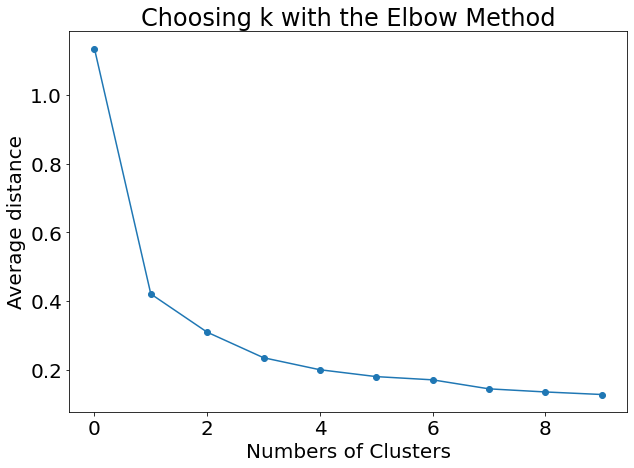

In [9]:
# using the elbow method to find out the clusters.
from scipy.spatial.distance import cdist 
Cluster = range(10) 
Meandist = list()

for k in Cluster:
    model = KMeans(n_clusters=k+1) 
    model.fit(Min_max_scaled) 
    Meandist.append(sum(np.min(cdist(Min_max_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / Min_max_scaled.shape[0]) 

# setting all the parameter and ploting the graph.

# define font size.
plots.rcParams.update({'font.size': 20})
# define figure size.
plots.figure(figsize=(10,7))
# set parameter for graph.
plots.plot(Cluster, Meandist, marker="o") 
# define xlabel.
plots.xlabel('Numbers of Clusters')
# define ylabel.
plots.ylabel('Average distance') 
# define title for graph.
plots.title('Choosing k with the Elbow Method'); 

In [10]:
# define classifier for clustering.
k_means_model = KMeans(n_clusters=3, max_iter=100, n_init=10,random_state=10)
# fit classifier with data.  
k_means_model.fit(Min_max_scaled) 
# predict model to getting the label.
predictions = k_means_model.predict(Min_max_scaled)  

In [11]:
predictions 

array([0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2], dtype=int32)

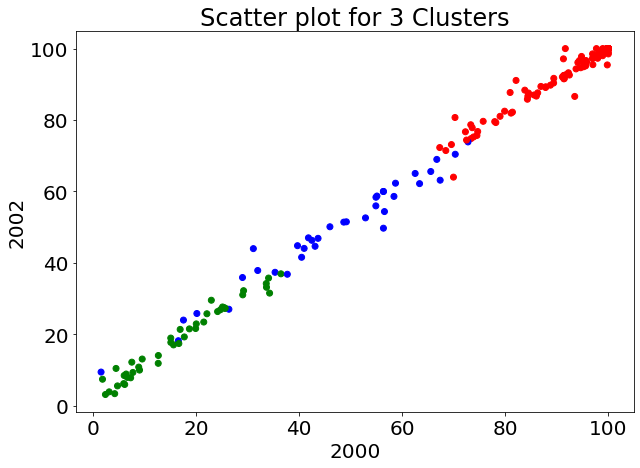

In [12]:
# define color for all clusters.
color_map = {0 : 'r', 1 : 'b', 2 : 'g'} 
def color(x):  
    return color_map[x]  
colors = list(map(color, k_means_model.labels_))   

# plotting the graph.

# define font size.
plots.rcParams.update({'font.size': 20})
# define figure size.
plots.figure(figsize=(10,7))
# set parameter for scatter plot.
plots.scatter(x=X.iloc[:,0], y=X.iloc[:,2], c=colors)  
# define xlabel.
plots.xlabel('2000')
# define ylabel.  
plots.ylabel('2002') 
# define title for graph. 
plots.title('Scatter plot for 3 Clusters');  

In [13]:
# Getting the Centroids and label.
centroids = k_means_model.cluster_centers_
u_labels = np.unique(predictions) 
centroids

array([[0.94710222, 0.95052381, 0.95285604, 0.95494702, 0.95720772,
        0.95863405, 0.96482248, 0.96295768, 0.96642967, 0.9684052 ,
        0.97163249, 0.97202665, 0.97507925, 0.9770426 , 0.97828314,
        0.98011735, 0.98207179, 0.98399711, 0.9849656 , 0.98719259,
        0.98880938],
       [0.45426545, 0.46558546, 0.47106662, 0.49057652, 0.50179853,
        0.52530799, 0.54969073, 0.55421676, 0.57389419, 0.58376087,
        0.59723732, 0.61377454, 0.64200995, 0.66573011, 0.68731626,
        0.70337934, 0.73082813, 0.75560982, 0.76587359, 0.78777383,
        0.79790595],
       [0.15287434, 0.16279363, 0.15869766, 0.16848246, 0.18028574,
        0.18393558, 0.200195  , 0.20456089, 0.20947557, 0.20884977,
        0.22814706, 0.24423516, 0.2585073 , 0.2593982 , 0.27574791,
        0.28517312, 0.3099095 , 0.32517787, 0.35303211, 0.37223534,
        0.37324831]])

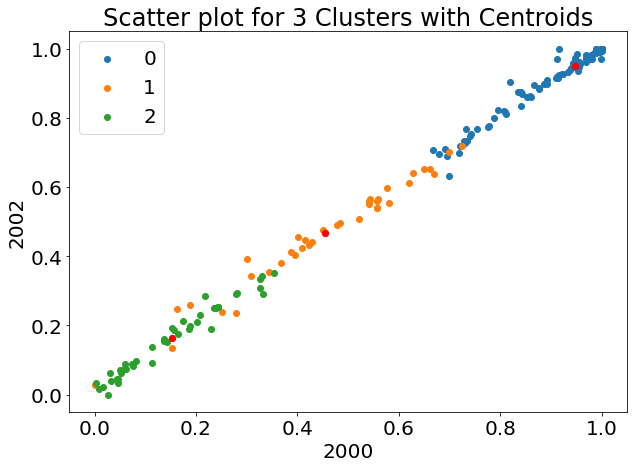

In [14]:
# plotting the results.
plots.figure(figsize=(10,7))
for i in u_labels:
    plots.scatter(Min_max_scaled[predictions == i , 0] , Min_max_scaled[predictions == i , 1] , label = i)  

# define parameter for graph like color, data etc.
plots.scatter(centroids[:,0] , centroids[:,1] , s = 40, color = 'r') 
# define xlabel.
plots.xlabel('2000')
# define ylabel.
plots.ylabel('2002')
# define title for graphs.
plots.title('Scatter plot for 3 Clusters with Centroids') 
# define legend for graph.
plots.legend()  
plots.show()  

In [15]:
# creating the lists to extract all the cluster.
first_cluster=[]
second_cluster=[] 
third_cluster=[] 

# with the help of loop find out the data availabel in each cluster.
for i in range(len(predictions)):
    if predictions[i]==0:
        first_cluster.append(Final_Dataset.loc[i]['Country Name']) 
    elif predictions[i]==1:
        second_cluster.append(Final_Dataset.loc[i]['Country Name'])
    else:
        third_cluster.append(Final_Dataset.loc[i]['Country Name'])   

In [16]:
# showing the data present in first cluster.
First_cluster = np.array(first_cluster)
print(First_cluster)

['Aruba' 'Albania' 'Andorra' 'Arab World' 'United Arab Emirates'
 'Argentina' 'Armenia' 'American Samoa' 'Antigua and Barbuda' 'Australia'
 'Austria' 'Burundi' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas, The'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil'
 'Barbados' 'Central African Republic' 'Canada'
 'Central Europe and the Baltics' 'Switzerland' 'Channel Islands' 'Chile'
 'Congo, Rep.' 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba'
 'Curacao' 'Cayman Islands' 'Cyprus' 'Czechia' 'Djibouti' 'Dominica'
 'Denmark' 'Dominican Republic' 'Algeria' 'Early-demographic dividend'
 'East Asia & Pacific' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia' 'Ecuador' 'Egypt, Arab Rep.' 'Eritrea' 'Spain'
 'Ethiopia' 'Fragile and conflict affected situations' 'Finland' 'Fiji'
 'France' 'Micronesia, Fed. Sts.' 'Gabon' 'United Kingdom' 'Ghana'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada' 'Greenland'
 'Guatemala' 'Guam' 'Guyana' 'Ho

In [17]:
# showing the data present in second cluster.
Second_cluster = np.array(second_cluster)
print(Second_cluster)  

['Afghanistan' 'Burkina Faso' 'Brunei Darussalam' 'Bhutan' 'China'
 "Cote d'Ivoire" 'Colombia' 'Comoros' 'Germany'
 'East Asia & Pacific (excluding high income)' 'European Union'
 'Faroe Islands' 'Georgia' 'Gambia, The' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA only' 'Kazakhstan' 'Kenya' 'Korea, Rep.'
 'Least developed countries: UN classification' 'Middle income'
 'North America' 'Namibia' 'Nigeria' 'Nauru' 'New Zealand' 'Puerto Rico'
 'French Polynesia' 'Russian Federation' 'San Marino' 'Somalia'
 'Small states' 'Europe & Central Asia (IDA & IBRD countries)'
 'Tajikistan' 'British Virgin Islands']


In [18]:
# showing the data present in third cluster.
Third_cluster = np.array(third_cluster)
print(Third_cluster)  

['Africa Eastern and Southern' 'Africa Western and Central' 'Angola'
 'Azerbaijan' 'Belgium' 'Benin' 'Botswana' 'Cameroon' 'Congo, Dem. Rep.'
 'Euro area' 'Estonia' 'Gibraltar' 'Guinea' 'Hong Kong SAR, China'
 'Heavily indebted poor countries (HIPC)' 'IDA blend' 'Jordan' 'Liberia'
 'Libya' 'Liechtenstein' 'St. Martin (French part)' 'Mexico'
 'Middle East & North Africa (excluding high income)' 'Montenegro'
 'Northern Mariana Islands' 'Mauritius' 'Malaysia' 'Panama' 'Philippines'
 'Post-demographic dividend' 'Romania' 'South Asia' 'Saudi Arabia'
 'Singapore' 'Sierra Leone' 'El Salvador' 'Sweden' 'Seychelles'
 'Turkmenistan' 'South Asia (IDA & IBRD)'
 'Sub-Saharan Africa (IDA & IBRD countries)' 'Uzbekistan' 'Vietnam'
 'Vanuatu']


In [19]:
first_cluster = First_cluster[3] 
print('Country name :', first_cluster)
arab_country = Final_Dataset3[Final_Dataset3['Country Name']==8]  
arab_country = np.array(arab_country)  
arab_country = np.delete(arab_country,1) 
arab_country    

Country name : Arab World


array([8, 81.121777566806, 81.9465843239392, 81.9250773003536,
       82.9121357451822, 82.8841937281191, 83.6107259153805,
       85.8164649345222, 84.1222350199364, 83.7960814380495,
       84.6641603144405, 87.3751069197478, 87.6000013937688,
       87.2875085854602, 89.2967255803414, 88.2820601431627,
       88.8911296243003, 89.3542220760166, 90.4460099173841,
       88.9162428638274, 90.0075969383761, 90.2343895506216], dtype=object)

In [20]:
second_cluster = Second_cluster[0] 
print('Country name :', second_cluster) 
afganistan_country = Final_Dataset3[Final_Dataset3['Country Name']==0] 
afganistan_country = np.array(afganistan_country)  
afganistan_country = np.delete(afganistan_country,1) 
afganistan_country  

Country name : Afghanistan


array([0, 1.61359095573425, 4.07457399368286, 9.40915775299072,
       14.7385063171387, 20.0649681091309, 25.3908939361572,
       30.7186908721924, 36.0510101318359, 42.4000015258789,
       46.7400512695313, 42.7000007629395, 43.2220191955566,
       69.0999984741211, 68.2906494140625, 89.5, 71.5, 97.6999969482422,
       97.6999969482422, 96.6161346435547, 97.6999969482422,
       97.6999969482422], dtype=object)

In [21]:
third_cluster = Third_cluster[0] 
print('Country name :', third_cluster) 
africa_country = Final_Dataset3[Final_Dataset3['Country Name']==1] 
africa_country= np.array(africa_country)  
africa_country = np.delete(africa_country,1) 
africa_country  

Country name : Africa Eastern and Southern


array([1, 19.9579298951035, 19.9862203237456, 21.6015034178654,
       22.5483066365335, 23.8158804627515, 23.4811562468684,
       24.7499128916126, 26.7515912769659, 25.913958456892,
       26.1513599969695, 27.4827342843522, 28.9486279353382,
       31.6823177047106, 31.6106918811145, 31.8249495513156,
       33.7444046301052, 38.7333520303803, 40.0921632933888,
       42.8809766258104, 44.0739121045303, 45.6096042884373], dtype=object)

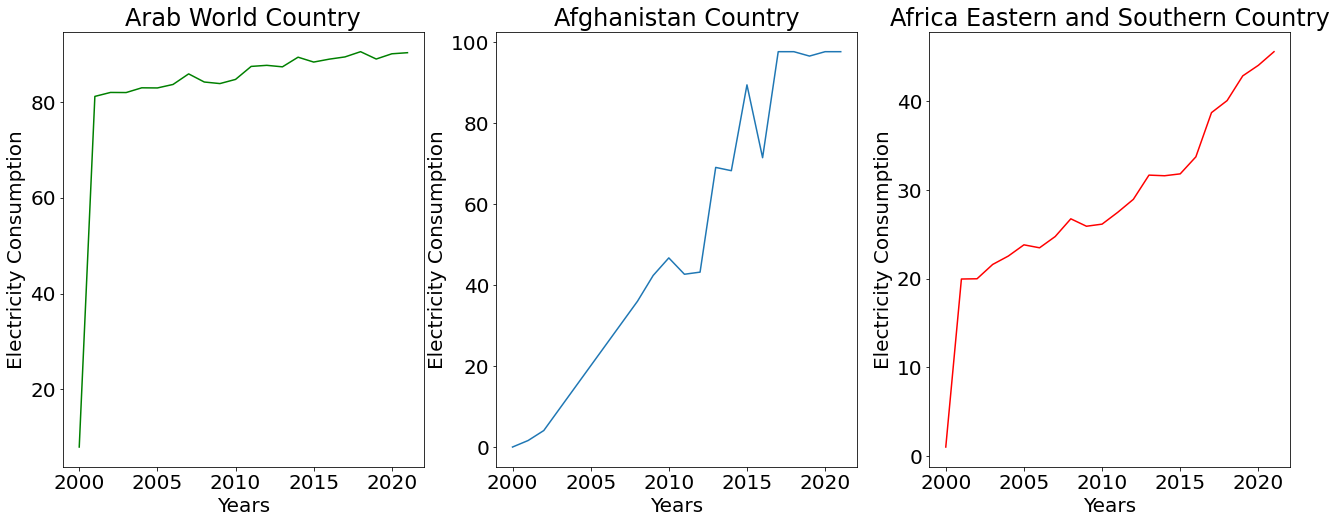

In [22]:
# plotting the line graph for different clusters.
year=list(range(2000,2022))
# define figure size for graph.
plots.figure(figsize=(22,8))

plots.subplot(131)
plots.xlabel('Years')
plots.ylabel('Electricity Consumption') 
plots.title('Arab World Country') 
plots.plot(year,arab_country, color='g');

plots.subplot(132)
plots.xlabel('Years')
plots.ylabel('Electricity Consumption') 
plots.title('Afghanistan Country') 
plots.plot(year,afganistan_country);

plots.subplot(133) 
plots.xlabel('Years') 
plots.ylabel('Electricity Consumption')
plots.title('Africa Eastern and Southern Country') 
plots.plot(year,africa_country, color='r');

# Curve Fitting

In [23]:
# Creating the function for analyse the dataset.
def read_dataset(File): 
    co2_data = PD.read_csv(File, skiprows=4) #dataset reading with pandas. 
    co2_data1 = co2_data.drop(['Unnamed: 66', 'Indicator Code',  'Country Code'],axis=1) # dropping some column from dataset.
    co2_data2 = co2_data1.fillna(co2_data1.mean()) # fill the mean of data in column.
    co2_data3 = co2_data2.set_index("Country Name")  
    co2_data3 = co2_data3.T 
    co2_data3.reset_index(inplace=True) 
    co2_data3.rename(columns = {'index':'Year'}, inplace = True)
    return co2_data2, co2_data3  

# define the path of co2 emission data.
File = '/content/drive/MyDrive/Rahul Assignment/API_19_DS2_en_csv_v2_4773766.csv'  
co2_Dataset, transpose_data = read_dataset(File)  
co2_Dataset.head() # print starting 5 rows of data.

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,Urban population (% of total population),5.077600e+01,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
1,Aruba,Urban population,2.772800e+04,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,30052.000000,30160.000000,...,43864.000000,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000
2,Aruba,Urban population growth (annual %),2.536675e+07,2.147858,1.520329,1.357042,1.186472,1.001576,0.835371,0.358733,...,0.849393,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951
3,Aruba,"Population, total",5.460800e+04,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,59291.000000,59522.000000,...,102112.000000,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000
4,Aruba,Population growth (annual %),2.536675e+07,2.179059,1.548572,1.389337,1.215721,1.032841,0.862184,0.388847,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045


In [24]:
transpose_data

Country Name,Year,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
0,Indicator Name,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $2.15 a day (2017 P...,"Prevalence of underweight, weight for age (% o...","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (%...,Urban land area where elevation is below 5 met...,Urban land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
1,1960,50.776,27728.0,25366749.398085,54608.0,25366749.398085,25366749.398085,25366749.398085,25366749.398085,25366749.398085,...,25366749.398085,25366749.398085,25366749.398085,25366749.398085,25366749.398085,25366749.398085,25366749.398085,25366749.398085,25366749.398085,25366749.398085
2,1961,50.761,28330.0,2.147858,55811.0,2.179059,16436425.93876,16436425.93876,16436425.93876,16436425.93876,...,16436425.93876,16436425.93876,16436425.93876,16436425.93876,16436425.93876,16436425.93876,16436425.93876,4.87269,28.396019,109850.0
3,1962,50.746,28764.0,1.520329,56682.0,1.548572,17091346.252411,17091346.252411,17091346.252411,17091346.252411,...,17091346.252411,17091346.252411,17091346.252411,17091346.252411,17091346.252411,17091346.252411,17091346.252411,5.001939,28.615743,110700.0
4,1963,50.73,29157.0,1.357042,57475.0,1.389337,18223809.701496,18223809.701496,18223809.701496,18223809.701496,...,18223809.701496,18223809.701496,18223809.701496,18223809.701496,18223809.701496,18223809.701496,18223809.701496,5.131188,28.835466,111550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2017,43.293,45648.0,0.771899,105439.0,0.537296,15589440.923809,15589440.923809,15589440.923809,15589440.923809,...,45.451183,175827.9,15589440.923809,15589440.923809,15589440.923809,15589440.923809,15589440.923809,10.339925,41.876696,162000.0
59,2018,43.411,45999.0,0.765986,105962.0,0.494795,15794363.852786,15794363.852786,15794363.852786,15794363.852786,...,45.332093,175367.2,15794363.852786,15794363.852786,15794363.852786,15794363.852786,15794363.852786,10.339925,41.876696,162000.0
60,2019,43.546,46351.0,0.762321,106442.0,0.45197,15752740.312858,15752740.312858,15752740.312858,15752740.312858,...,45.213002,174906.5,15752740.312858,15752740.312858,15752740.312858,15752740.312858,15752740.312858,10.339925,41.876696,162000.0
61,2020,43.697,46574.0,0.479958,106585.0,0.134255,25089072.887726,25089072.887726,25089072.887726,25089072.887726,...,45.093912,174445.8,25089072.887726,25089072.887726,25089072.887726,25089072.887726,25089072.887726,10.339925,41.876696,162000.0


In [25]:
# check shape of data.
co2_Dataset.shape 

(20216, 64)

In [26]:
# check null values in data.
co2_Dataset.isnull().sum()

Country Name      0
Indicator Name    0
1960              0
1961              0
1962              0
                 ..
2017              0
2018              0
2019              0
2020              0
2021              0
Length: 64, dtype: int64

In [27]:
# selecting all columns and convert into array.
x = np.array(co2_Dataset.columns) 
# dropping some columns.
x = np.delete(x,0) 
x = np.delete(x,0) 
# convert data type as int.
x = x.astype(np.int)

# selecting all the data for urban population and india.
curve_fit = co2_Dataset[(co2_Dataset['Indicator Name']=='Urban population') & (co2_Dataset['Country Name']=='India')]   

# convert into array.
y = curve_fit.to_numpy()
# dropping some columns.
y = np.delete(y,0) 
y = np.delete(y,0)
# convert data type as int.
y = y.astype(np.int) 

In [32]:
# import scipy.
import scipy
# it is python library which is used to work with arrays.
import numpy as np 
# importing curve fit from scipy.
from scipy.optimize import curve_fit
# Matplotlib is a Python library that lets you make rigid, animated, and interactive visualisations. Matplotlib makes things that are easy and things that are hard possible.
import matplotlib.pyplot as plots
from scipy import stats 

# Define the function to be fitted (linear function y = mx + c)
def linear_func(x, m, c):
    return m*x + c

def create_curve_fit(x,y): 

    # Perform curve fitting
    popt, pcov = curve_fit(linear_func, x, y) 

    # Extract the fitted parameters and their standard errors
    m, c = popt
    m_err, c_err = np.sqrt(np.diag(pcov)) 

    # Calculate the lower and upper limits of the confidence range
    conf_int = 0.95  # set the confidence interval as 95%
    alpha = 1.0 - conf_int 
    m_low, m_high = scipy.stats.t.interval(alpha, len(x)-2, loc=m, scale=m_err)
    c_low, c_high = scipy.stats.t.interval(alpha, len(x)-2, loc=c, scale=c_err)

    # Plot the best-fitting function and the confidence range.
    plots.figure(figsize=(12,6)) #define figure size.
    plots.rcParams.update({'font.size': 20}) #define fontsize.
    plots.plot(x, y, 'bo', label='Data') #set data for graph.
    plots.plot(x, linear_func(x, m, c), 'g', label='Fitted function')
    plots.fill_between(x, linear_func(x, m_low, c_low), linear_func(x, m_high, c_high), color='gray', alpha=0.5, label='Confidence range') # set all the parameter.
    plots.title('Curve Fitting') # define title for graph.
    plots.xlabel('Years') # define xlabel.
    plots.ylabel('Population') # define ylabel. 
    plots.legend() # set legend in graph.
    plots.show() 
    

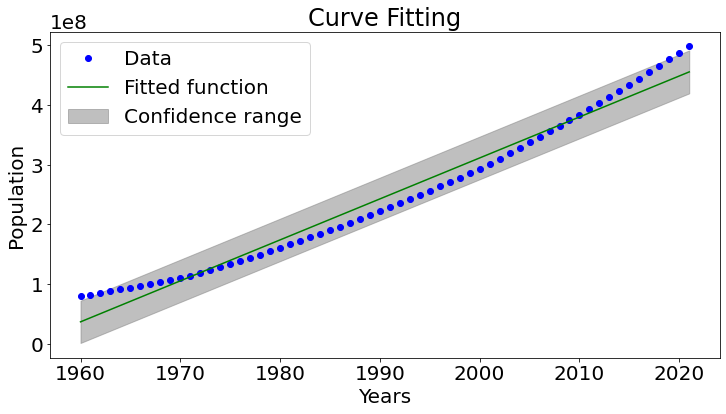

In [33]:
create_curve_fit(x,y)